In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Corrected variable name
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\dell\anaconda3\envs\python_class\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


What are the most demanded skills for the top 3 most popular data roles based on US?

Methodology

   1.Clean-up skill column
   2.Calculate skill count based on job_title_short
   3.Calculate skill percentage
   4.Plot final findings 

In [2]:
df_US = df[df["job_country"] == "United States"]

In [3]:
df_skills = df_US.explode("job_skills")

df_skills[["job_title_short","job_skills"]]

df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name="count")
df_skills_count.sort_values(by="count",ascending = False,inplace = True)

In [4]:
job_title = df_skills_count["job_title_short"].unique()
job_title = sorted(job_title[:3])

job_title

['Data Analyst', 'Data Engineer', 'Data Scientist']

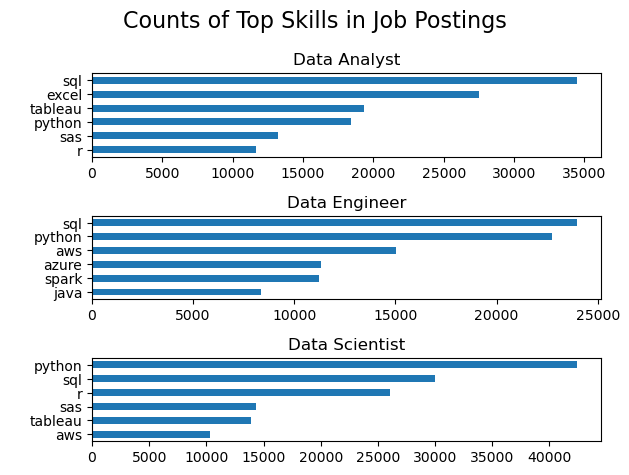

In [5]:
fig,ax = plt.subplots(len(job_title),1)

for i, title in enumerate(job_title):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == title].head(6)

    df_plot.plot( kind = "barh", x= "job_skills", y = "count", ax=ax[i],title = title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel(" ")
    ax[i].legend().remove()

fig.suptitle("Counts of Top Skills in Job Postings",fontsize=16)
fig.tight_layout()    



In [6]:
df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name="jobs_total")

In [7]:
df_skill_perc = pd.merge(df_skills_count,df_job_title_count,how="left",on = "job_title_short")

df_skill_perc["skill_percent"] = 100 * df_skill_perc["count"]/df_skill_perc["jobs_total"]
df_skill_perc

,job_skills,job_title_short,count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


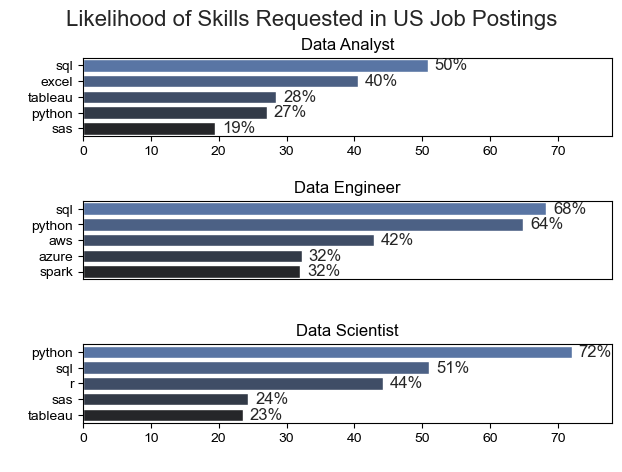

In [ ]:
fig,ax = plt.subplots(len(job_title),1)

sns.set_theme(style="ticks")

for i, title in enumerate(job_title):
    df_plot = df_skill_perc[df_skill_perc["job_title_short"] == title].head(5)

    #df_plot.plot( kind = "barh", x= "job_skills", y = "skill_percent", ax=ax[i],title = title)
    sns.barplot(data = df_plot, x = "skill_percent",y = "job_skills",ax=ax[i],hue="job_skills",palette="dark:b_r",dodge=False)

    ax[i].set_title(title)
    ax[i].set_xlabel(" ")
    ax[i].set_ylabel(" ")
    ax[i].set_xlim(0,78)
    #ax[i].legend().set_visible(False)
     
    for n,v in enumerate(df_plot["skill_percent"]):
       ax[i].text(v +1 , n, f'{int(v)}%',va= "center")

    if i != len(job_title) -1:
        ax[1].set_xticks([])

fig.suptitle("Likelihood of Skills Requested in US Job Postings",fontsize=16)
fig.tight_layout(h_pad=0.1)    
fig.subplots_adjust(top=0.88)

plt.show()
